In [6]:
!pip install numpy
!pip install matplotlib

import numpy as np
import math

from funktionen_durchstanzen import *
import input_durchstanzen

In [7]:
# Last-Plattenrotation-Charakteristik (Näherung)
steps = 200
V_di = np.linspace(10,8000,steps)    # Querkraftbeanspruchung [kN]

In [10]:
# Beiwert zur Berücksichigung der Rissverzahnungseffekt anhand des Grösskorns
k_g = 48 / (16 + input_durchstanzen.D_max)
print('k_g = ', k_g)

k_g =  1.0


In [9]:
# Bestimmung der Stützstreifenbreite
b_s = stuetzstreifenbreite(input_durchstanzen.r_sx1, input_durchstanzen.r_sx2, input_durchstanzen.r_sy1, input_durchstanzen.r_sy2)
print('b_s = ', b_s)

b_s =  2940.0


In [29]:
# Ermittlung der Plattenbiegetragsicherheit
m_Rdx = biegewiderstand(input_durchstanzen.diam_sx, input_durchstanzen.s_x, input_durchstanzen.d_sx, input_durchstanzen.f_sd, input_durchstanzen.f_cd)
print('m_Rdx = %.1f'%(m_Rdx * 1e-6), 'kN') 
m_Rdy = biegewiderstand(input_durchstanzen.diam_sy, input_durchstanzen.s_y, input_durchstanzen.d_sy, input_durchstanzen.f_sd, input_durchstanzen.f_cd)
print('m_Rdy = %.1f'%(m_Rdy * 1e-6), 'kN') 

m_Rdx = 511.6 kN
m_Rdy = 465.6 kN


In [63]:
# Mindestdurchstanzbewehrung
V_Rdsmin = 0.5 * V_di
A_swmin = (1000 * V_Rdsmin) / (input_durchstanzen.f_sd * input_durchstanzen.k_e * np.sin(input_durchstanzen.beta))
rho_sw_min = 0.005 * ((input_durchstanzen.f_ck / 30) ** (0.5)) * (500 / input_durchstanzen.f_sk)

psi = plattenrot(V_di, input_durchstanzen.k, input_durchstanzen.l_x, input_durchstanzen.l_y, m_Rdx, m_Rdy, input_durchstanzen.f_sd, input_durchstanzen.E_s, input_durchstanzen.d_sx, input_durchstanzen.d_sy)

print('psi[0] =', psi[0])
print('psi[1] =', psi[1])

psi[0] = [2.82077817e-06 3.16799970e-05 7.65440496e-05 1.32906540e-04
 1.98769153e-04 2.72917861e-04 3.54512595e-04 4.42926994e-04
 5.37670597e-04 6.38345759e-04 7.44621594e-04 8.56217136e-04
 9.72889916e-04 1.09442790e-03 1.22064358e-03 1.35136963e-03
 1.48645548e-03 1.62576469e-03 1.76917293e-03 1.91656619e-03
 2.06783952e-03 2.22289584e-03 2.38164500e-03 2.54400302e-03
 2.70989140e-03 2.87923653e-03 3.05196926e-03 3.22802439e-03
 3.40734039e-03 3.58985898e-03 3.77552493e-03 3.96428577e-03
 4.15609155e-03 4.35089469e-03 4.54864976e-03 4.74931334e-03
 4.95284385e-03 5.15920148e-03 5.36834800e-03 5.58024672e-03
 5.79486234e-03 6.01216088e-03 6.23210964e-03 6.45467705e-03
 6.67983265e-03 6.90754703e-03 7.13779175e-03 7.37053930e-03
 7.60576306e-03 7.84343722e-03 8.08353678e-03 8.32603748e-03
 8.57091578e-03 8.81814881e-03 9.06771435e-03 9.31959081e-03
 9.57375717e-03 9.83019299e-03 1.00888783e-02 1.03497939e-02
 1.06129206e-02 1.08782402e-02 1.11457346e-02 1.14153864e-02
 1.16871783e-02

In [32]:
# Umfang des Nachweisschnitts [mm]
u = nachweisumfang(input_durchstanzen.d_v, input_durchstanzen.stuetzenform, input_durchstanzen.diam, input_durchstanzen.b1, input_durchstanzen.b2)
print('Umfang = %.1f'%u, 'mm')

Umfang = 2180.3 mm


In [62]:
## Durchstanzwiderstand ohne Querkraftbewehrung (LoA III)
k_r =  rotationsbeiwert(psi, input_durchstanzen.d_sx, input_durchstanzen.d_sy, k_g)
#print('k_rx = ', k_r[0])
#print('k_ry = ', k_r[1])

V_Rdc = [(k_r[0] * input_durchstanzen.tau_cd * input_durchstanzen.d_v * u * input_durchstanzen.k_e)/1000,     
         (k_r[1] * input_durchstanzen.tau_cd * input_durchstanzen.d_v * u * input_durchstanzen.k_e)/1000 ]    # SIA 262(2013), Gl. (57)
#print('V_Rdc,x = ', V_Rdc[0], 'kN')
#print('V_Rdc,y = ', V_Rdc[1], 'kN')

# Durchstanzwiderstand ohne Durchstanzbewehrung
idx_c = [(np.argwhere(np.diff(np.sign(V_di - V_Rdc[0]))).flatten()) , 
         (np.argwhere(np.diff(np.sign(V_di - V_Rdc[1]))).flatten())]

V_Rdc_widerstand = [V_Rdc[0][idx_c[0]], V_Rdc[1][idx_c[1]]]

print('k_rx_widerstand = %.3f'%k_r[0][idx_c[0]], '-')
print('V_Rdx_widerstand = %.1f'%V_Rdc_widerstand[0], 'kN\n')

print('k_rx_widerstand = %.3f'%k_r[0][idx_c[0]], '-')
print('V_Rdy_widerstand = %.1f'%V_Rdc_widerstand[1], 'kN')


k_rx_widerstand = 1.278 -
V_Rdx_widerstand = 1720.8 kN

k_rx_widerstand = 1.278 -
V_Rdy_widerstand = 1643.9 kN


In [49]:
## Durchstanzwiderstand mit Querkraftbewehrung
A_sw = 5200
f_bd = verbundschub(input_durchstanzen.f_ctm, input_durchstanzen.gamma_c)

sigma_sd = [((1/6) * (input_durchstanzen.E_s * psi[0]) * (1 + (f_bd / input_durchstanzen.f_sd)*(input_durchstanzen.d_sx / input_durchstanzen.diam_sw))), 
            ((1/6) * (input_durchstanzen.E_s * psi[1]) * (1 + (f_bd / input_durchstanzen.f_sd)*(input_durchstanzen.d_sy / input_durchstanzen.diam_sw)))]

# Bewehrungsspannung auf Fliessgrenze begrenzen
sigma_sd = [np.clip(sigma_sd[0] , 0 , input_durchstanzen.f_sd),
            np.clip(sigma_sd[1] , 0 , input_durchstanzen.f_sd)]
print('sig_sd[0] = ', sigma_sd[0])
print('sig_sd[1] = ', sigma_sd[1])

V_Rds = [(A_sw * sigma_sd[0] * input_durchstanzen.k_e * np.sin(math.radians(input_durchstanzen.beta)) / 1000),
         (A_sw * sigma_sd[1] * input_durchstanzen.k_e * np.sin(math.radians(input_durchstanzen.beta)) / 1000)]

print('V_Rds,x = ', V_Rds[0])
print('V_Rds,y = ', V_Rds[1])



sig_sd[0] =  [1.04354285e-01 1.17199695e+00 2.83173615e+00 4.91685841e+00
 7.35343636e+00 1.00965572e+01 1.31151427e+01 1.63860207e+01
 1.98910467e+01 2.36155099e+01 2.75471692e+01 3.16756303e+01
 3.59919231e+01 4.04882033e+01 4.51575345e+01 4.99937260e+01
 5.49912075e+01 6.01449320e+01 6.54502990e+01 7.09030918e+01
 7.64994271e+01 8.22357133e+01 8.81086159e+01 9.41150276e+01
 1.00252044e+02 1.06516943e+02 1.12907166e+02 1.19420300e+02
 1.26054070e+02 1.32806319e+02 1.39675004e+02 1.46658184e+02
 1.53754012e+02 1.60960726e+02 1.68276647e+02 1.75700167e+02
 1.83229749e+02 1.90863920e+02 1.98601265e+02 2.06440428e+02
 2.14380102e+02 2.22419031e+02 2.30556004e+02 2.38789853e+02
 2.47119452e+02 2.55543713e+02 2.64061583e+02 2.72672046e+02
 2.81374115e+02 2.90166837e+02 2.99049286e+02 3.08020564e+02
 3.17079802e+02 3.26226152e+02 3.35458794e+02 3.44776927e+02
 3.54179775e+02 3.63666582e+02 3.73236610e+02 3.82889142e+02
 3.92623479e+02 4.02438939e+02 4.12334857e+02 4.22310584e+02
 4.32365487

In [52]:
# Durchstanzwiderstand des inneren Nachweisschnitts
V_Rd_in = np.add(V_Rdc,V_Rds)
idx_in = [(np.argwhere(np.diff(np.sign(V_di - V_Rd_in[0]))).flatten()),
          (np.argwhere(np.diff(np.sign(V_di - V_Rd_in[1]))).flatten())]

print('V_Rd_in,x = %.1f'%V_Rd_in[0][idx_in[0]], 'kN')
print('V_Rd_in,y = %.1f'%V_Rd_in[1][idx_in[1]], 'kN')

V_Rd_in,x = 3514.5 kN
V_Rd_in,y = 3448.2 kN


In [54]:
# Obere Schubspannungsgrenze des Durchstanzwiderstands
V_Rd_sup = [((2 * k_r[0] * input_durchstanzen.tau_cd * input_durchstanzen.d_v * u * input_durchstanzen.k_e)/1000),
            ((2 * k_r[0] * input_durchstanzen.tau_cd * input_durchstanzen.d_v * u * input_durchstanzen.k_e)/1000)]

# Begrenzung
V_Rd_sup = np.clip(V_Rd_sup , 0 ,(3.5 * input_durchstanzen.tau_cd * input_durchstanzen.d_v * u * input_durchstanzen.k_e)/1000)
idx_sup = [(np.argwhere(np.diff(np.sign(V_di - V_Rd_sup[0]))).flatten()),
           (np.argwhere(np.diff(np.sign(V_di - V_Rd_sup[1]))).flatten())]

print('V_Rd_sup,x = %.1f'%V_Rd_sup[0][idx_sup[0]], 'kN')
print('V_Rd_sup,y = %.1f'%V_Rd_sup[1][idx_sup[1]], 'kN')

V_Rd_sup,x = 2525.7 kN
V_Rd_sup,y = 2525.7 kN


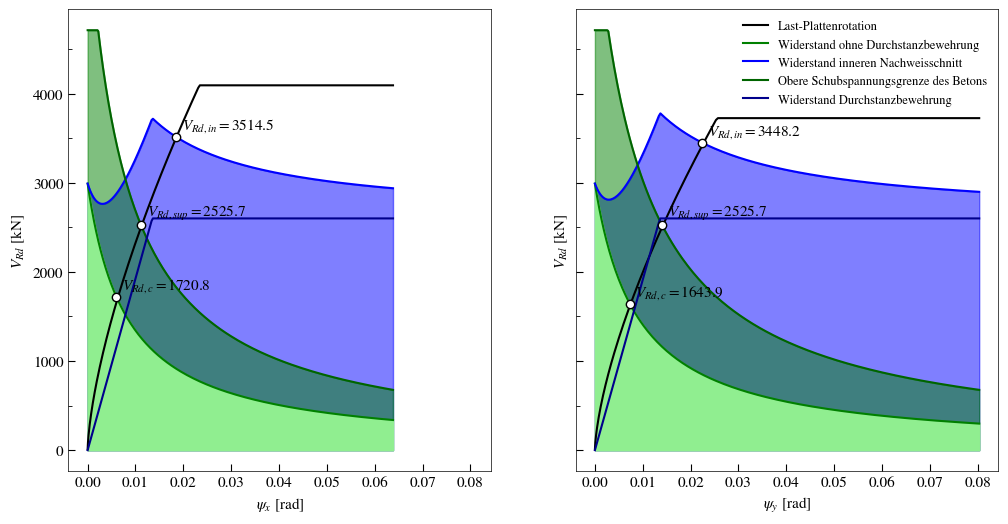

In [56]:
# Plot
plot_durchstanzen(psi, V_di, input_durchstanzen.k, m_Rdx, m_Rdy, V_Rdc, V_Rd_in, V_Rd_sup, V_Rds, idx_c, idx_in, idx_sup)